In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
os.chdir('./drive/My Drive/Colab Notebooks/Voice Recognition//')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('./data.csv')
data.head(3)

,Files,labels,Frequency,Audio_length,zcr_mean,sp_cen_mean,sp_rf_mean,mfcc_mean,spec_bw_mean,rmse_mean,chroma_stft_mean,Chromagram,MelSpectrohram,Amplitude_db
0,Copy of PTT-20190716-WA0040.wav,1,22050.0,1.70,0.095385,1557.936608,2977.110827,-21.310974,1446.468570,0.007986,0.461959,0.276743,0.042042,-45.591785
1,Copy of PTT-20190716-WA0041.wav,1,22050.0,1.79,0.115664,1774.966989,3151.163424,-14.459980,1608.826526,0.036079,0.299946,0.260970,0.822725,-30.595629
2,Copy of PTT-20190716-WA0042.wav,1,22050.0,2.62,0.117430,1853.480595,3594.329888,-15.858596,1635.967540,0.018241,0.338664,0.271582,0.203850,-36.165131


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 14 columns):
Files               582 non-null object
labels              582 non-null int64
Frequency           556 non-null float64
Audio_length        556 non-null float64
zcr_mean            556 non-null float64
sp_cen_mean         556 non-null float64
sp_rf_mean          556 non-null float64
mfcc_mean           556 non-null float64
spec_bw_mean        556 non-null float64
rmse_mean           556 non-null float64
chroma_stft_mean    556 non-null float64
Chromagram          556 non-null float64
MelSpectrohram      556 non-null float64
Amplitude_db        556 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 63.7+ KB


In [0]:
data = data.dropna()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 581
Data columns (total 14 columns):
Files               556 non-null object
labels              556 non-null int64
Frequency           556 non-null float64
Audio_length        556 non-null float64
zcr_mean            556 non-null float64
sp_cen_mean         556 non-null float64
sp_rf_mean          556 non-null float64
mfcc_mean           556 non-null float64
spec_bw_mean        556 non-null float64
rmse_mean           556 non-null float64
chroma_stft_mean    556 non-null float64
Chromagram          556 non-null float64
MelSpectrohram      556 non-null float64
Amplitude_db        556 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 65.2+ KB


In [8]:
data2 = data.drop(['Audio_length','Frequency'],axis=1)
data2.head(3)

,Files,labels,zcr_mean,sp_cen_mean,sp_rf_mean,mfcc_mean,spec_bw_mean,rmse_mean,chroma_stft_mean,Chromagram,MelSpectrohram,Amplitude_db
0,Copy of PTT-20190716-WA0040.wav,1,0.095385,1557.936608,2977.110827,-21.310974,1446.468570,0.007986,0.461959,0.276743,0.042042,-45.591785
1,Copy of PTT-20190716-WA0041.wav,1,0.115664,1774.966989,3151.163424,-14.459980,1608.826526,0.036079,0.299946,0.260970,0.822725,-30.595629
2,Copy of PTT-20190716-WA0042.wav,1,0.117430,1853.480595,3594.329888,-15.858596,1635.967540,0.018241,0.338664,0.271582,0.203850,-36.165131


In [0]:
X = data2.iloc[:,2:]



#### Using KMeans to find outliers in a cluster of points.
#### Finding outliers means finding the centroids and then looking
#### for elements by their distance from the centroids

In [0]:
from sklearn.cluster import KMeans

In [0]:
# a cluster with one center is similar to an SVM with one class
kmeans = KMeans(n_clusters=3)

In [133]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
x = X.values

In [0]:
Y = data2.labels

In [0]:
y = Y.values

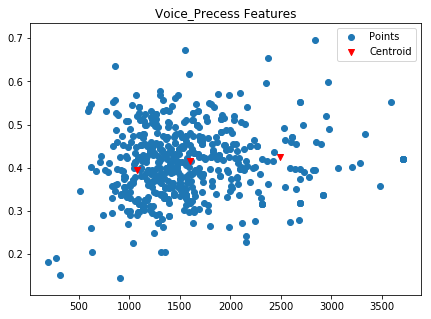

In [135]:
# looking at the plot
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Voice_Precess Features')
ax.scatter(x[:, 1],x[:,6], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 1],
           kmeans.cluster_centers_[:, 6], label='Centroid',
           color='r',marker='v')
ax.legend(loc='best')

In [147]:

# identify the 5 closest points
distances = kmeans.transform(x)
np.argsort(distances.ravel())

array([1360, 1156, 1342, ...,  861, 1191, 1251])

In [0]:
# argsort returns an array of indexes which will sort the array
# in ascending order. Reverse it with [::-1]
sorted_idx = np.argsort(distances.ravel())[0::][:6]
sorted_idx

IndexError: ignored

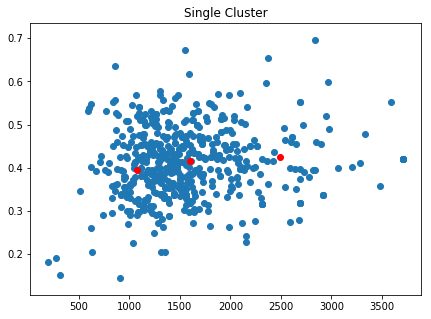

In [154]:
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Single Cluster')
ax.scatter(x[:, 1], x[:, 6], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 1],
           kmeans.cluster_centers_[:, 6],
           label='Centroid', color='r')
ax.scatter(x[sorted_idx][:, 1],
           [sorted_idx][:, 6],
           label='Extreme Value', edgecolors='g',
           facecolors='none', s=100)
ax.legend(loc='best')

In [141]:
x[sorted_idx]

IndexError: ignored

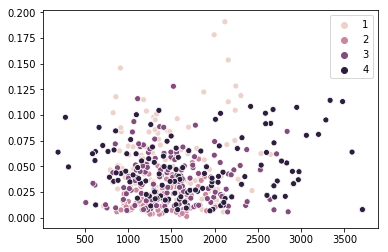

In [73]:
import seaborn as sns
sns.scatterplot(x[:,1],x[:,5],hue=y)

KeyError: ignored

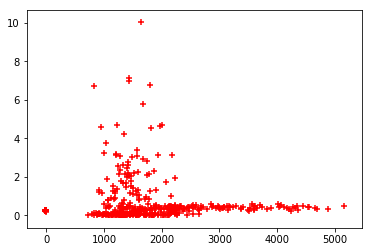

In [111]:
import pylab as pl
for i in range(0, x.shape[0]):
  if data2.labels[i] == 1:
    c1 = pl.scatter(x[i,1:5],x[i,5:-1],c='r',marker='+')
  elif data2.labels[i] == 2:
    c2 = pl.scatter(x[i,1:5],x[i,5:-1],c='g',marker='o')
  elif data2.labels[i] == 3:
    c3 = pl.scatter(x[i,1:5],x[i,5:-1],c='b',marker='*')
  elif data2.labels[i] == 4:
    c4 = pl.scatter(x[i,1:5],x[i,5:-1],c='y',marker='@')
pl.legend(['Normal', 'Bhagunnava','Namaskaram','Swagatham'])
pl.show()

In [89]:
data2.labels[]


3

In [116]:
x.shape[0]

556